Loading the dataset

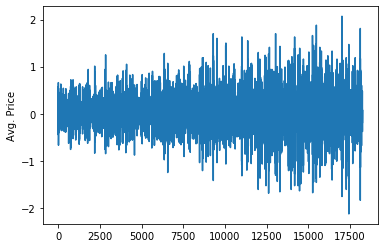

In [ ]:
import os
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('C:\\Users\\Mirela\\PycharmProjects\\Avocado\\avocado.csv',
                      usecols=[2]).values.astype('float32')


def delta_time_series(data):
    return data[1:] - data[:-1]

dataset = delta_time_series(dataset)

dataset.shape


def plot_delta(data):
    plt.plot(delta_time_series(data))
    plt.ylabel('Avg. Price')
    plt.show()

plot_delta(dataset)

In [43]:
# Helper function to get y as a numpy array from the TimeseriesGenerator
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y



In [44]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [45]:
# split into train and test sets

train, val, test = dataset[0:12000, :], dataset[12001:13000, :], dataset[13001:None, :]

lookback = 84
step = 2
batch_size = 128

train_data_gen = TimeseriesGenerator(train, train,
                                     length=lookback, sampling_rate=step, stride=1,shuffle=True,
                                     batch_size=batch_size)

val_data_gen = TimeseriesGenerator(val, val,
                                   length=lookback, sampling_rate=step, stride=1,
                                   batch_size=batch_size)

test_data_gen = TimeseriesGenerator(test, test,
                                    length=lookback, sampling_rate=step, stride=1,
                                    batch_size=batch_size)

val_steps = (13000 - 12001 - lookback)
test_steps = (len(dataset) - 13001 - lookback)

In [46]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step,
dataset.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_data_gen, steps_per_epoch=500, epochs=20,
validation_data=val_data_gen,validation_steps=val_steps)




Epoch 1/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0583 - val_loss: 0.0892
Epoch 2/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0480 - val_loss: 0.0644
Epoch 3/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0452 - val_loss: 0.0825
Epoch 4/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0437 - val_loss: 0.0663
Epoch 5/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0426 - val_loss: 0.0482
Epoch 6/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0419 - val_loss: 0.0419
Epoch 7/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0414 - val_loss: 0.0879
Epoch 8/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0410 - val_loss: 0.0961
Epoch 9/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0409 - val_loss: 0.0698
Epoch 10/20
500/500 [==============================] - 13s 26ms/step - loss: 0.040

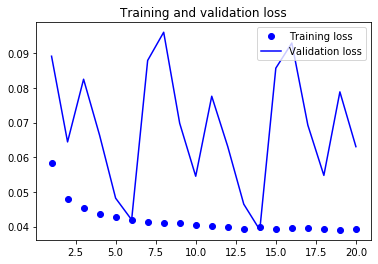

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_data_gen, steps_per_epoch=500, epochs=20,
validation_data=val_data_gen,
validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2,input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_data_gen,steps_per_epoch=500,epochs=40,validation_data=val_data_gen,
validation_steps=val_steps)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,dropout=0.1,recurrent_dropout=0.5,return_sequences=True,
input_shape=(None, dataset.shape[-1])))
model.add(layers.GRU(64, activation='relu',dropout=0.1,recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_data_gen,steps_per_epoch=500,epochs=40,validation_data=val_data_gen,validation_steps=val_steps)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()